In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from sklearn.utils import shuffle
import numpy as np
from numpy import genfromtxt
X=np.zeros((847,8000,1))
Y=np.zeros((847,2))


for i in range(847):
  my_data = genfromtxt("C:/Users/dianu/Downloads/SM/SM_Gen/SM"+str(i+1)+".csv", delimiter=',')
  my_data2 = genfromtxt("C:/Users/dianu/Downloads/SMy/SM_id_Gen/SMy"+str(i+1)+".csv", delimiter=',')
  X[i,:,0]=my_data
  Y[i,:]=my_data2


In [4]:
X, Y = shuffle(X, Y)

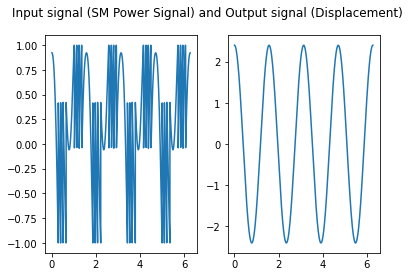

In [5]:
# Sample showing of input SM signal (left) and output displacement (output)
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
t= np.linspace(0, 2 * np.pi, 8000)
sig=Y[1,0]*np.cos(Y[1,1]*t) # Defining a cosinosoidal signal based on Target's amplitude and frequency
fig.suptitle('Input signal (SM Power Signal) and Output signal (Displacement)')
ax1.plot(t,X[1,:,0])
ax2.plot(t,sig)

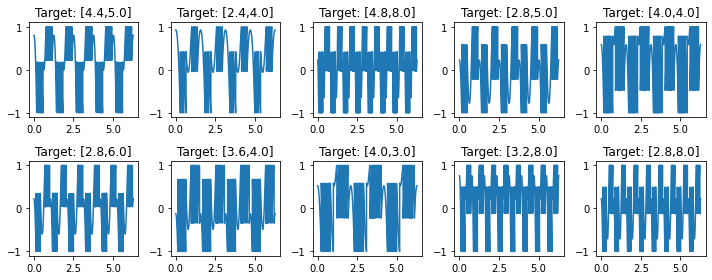

In [6]:
# Display of sample dataset
num_row = 2
num_col = 5
num=num_row*num_col
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.plot(t,X[i,:,0])
    ax.set_title("Target: ["+str(Y[i,0])+","+str(Y[i,1])+"]")
plt.tight_layout()
plt.show()

In [5]:
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

X_train = X[:split_train, :, [0]]; y_train=Y[:split_train, :]

X_valid = X[split_train:split_valid,:, [0]]; y_valid=Y[split_train:split_valid,:]

X_test = X[split_valid:,:, [0]]; y_test=Y[split_valid:,:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(592, 8000, 1) (592, 2)
(170, 8000, 1) (170, 2)
(85, 8000, 1) (85, 2)


In [12]:
#Utilizing 1D Convolution Model
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


In [13]:
n_timesteps=8000
n_features=1
n_outputs=2


model = Sequential()
model.add(Conv1D(filters=16, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(n_outputs))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7994, 16)          128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3997, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3991, 32)          3616      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1995, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1989, 64)          14400     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 994, 64)           0         
_________________________________________________________________
dropout (Dropout)            (None, 994, 64)           0

In [8]:
history=model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
19/19 [==============================] - 24s 89ms/step - loss: 10.5068 - accuracy: 0.5852 - val_loss: 1.7917 - val_accuracy: 0.7353
Epoch 2/100
19/19 [==============================] - 1s 44ms/step - loss: 2.0030 - accuracy: 0.7290 - val_loss: 1.5069 - val_accuracy: 0.7706
Epoch 3/100
19/19 [==============================] - 1s 44ms/step - loss: 1.3852 - accuracy: 0.7652 - val_loss: 1.0695 - val_accuracy: 0.8118
Epoch 4/100
19/19 [==============================] - 1s 44ms/step - loss: 0.9931 - accuracy: 0.8098 - val_loss: 0.8231 - val_accuracy: 0.8059
Epoch 5/100
19/19 [==============================] - 1s 45ms/step - loss: 0.7740 - accuracy: 0.7960 - val_loss: 0.7112 - val_accuracy: 0.8353
Epoch 6/100
19/19 [==============================] - 1s 44ms/step - loss: 0.6604 - accuracy: 0.8230 - val_loss: 0.5384 - val_accuracy: 0.8706
Epoch 7/100
19/19 [==============================] - 1s 44ms/step - loss: 0.5070 - accuracy: 0.8491 - val_loss: 0.4047 - val_accuracy: 0.8941
Epoc

Text(0.5, 1.0, 'Training and validation loss')

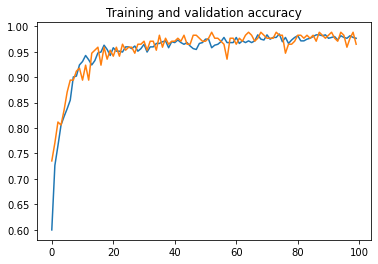

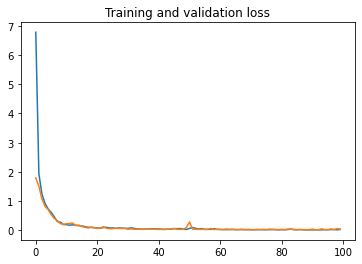

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [10]:
y_predictim=model.predict(X_test)

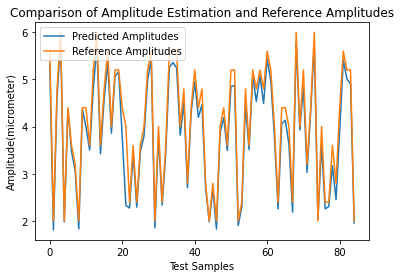

In [11]:
plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

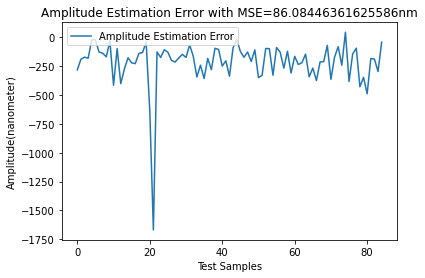

In [17]:
from sklearn.metrics import mean_squared_error
plt.plot(1000*(y_predictim[:,0]-y_test[:,0]),label="Amplitude Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(nanometer)')
plt.title('Amplitude Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,0], y_test[:,0]))+'nm')
plt.show()

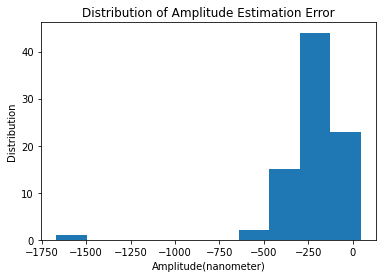

In [18]:
plt.hist(1000*(y_predictim[:,0]-y_test[:,0]), bins = 10)
plt.xlabel('Amplitude(nanometer)')
plt.ylabel('Distribution')
plt.title('Distribution of Amplitude Estimation Error')
plt.show()

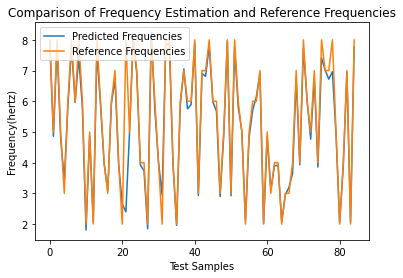

In [19]:
plt.plot(y_predictim[:,1],label="Predicted Frequencies")
plt.plot(y_test[:,1],label="Reference Frequencies")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(hertz)')
plt.title('Comparison of Frequency Estimation and Reference Frequencies')
plt.show()

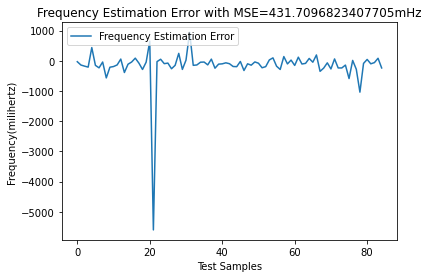

In [21]:
plt.plot(1000*(y_predictim[:,1]-y_test[:,1]),label="Frequency Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(milihertz)')
plt.title('Frequency Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,1], y_test[:,1]))+'mHz')
plt.show()

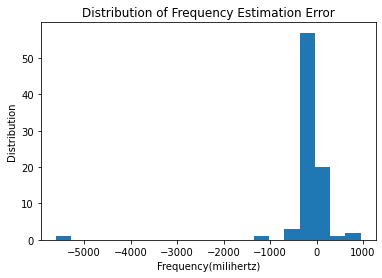

In [22]:
plt.hist(1000*(y_predictim[:,1]-y_test[:,1]), bins = 20)
plt.xlabel('Frequency(milihertz)')
plt.ylabel('Distribution')
plt.title('Distribution of Frequency Estimation Error')
plt.show()
